<a href="https://colab.research.google.com/github/pHarisairamreddy18/SENTIMENT-ANALYSIS/blob/main/Airline_Tweet_Sentiment_Analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle
!kaggle datasets download -d crowdflower/twitter-airline-sentiment
!unzip twitter-airline-sentiment.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment
License(s): CC-BY-NC-SA-4.0
  0% 0.00/2.55M [00:00<?, ?B/s]
100% 2.55M/2.55M [00:00<00:00, 680MB/s]
Archive:  twitter-airline-sentiment.zip
  inflating: Tweets.csv              
  inflating: database.sqlite         


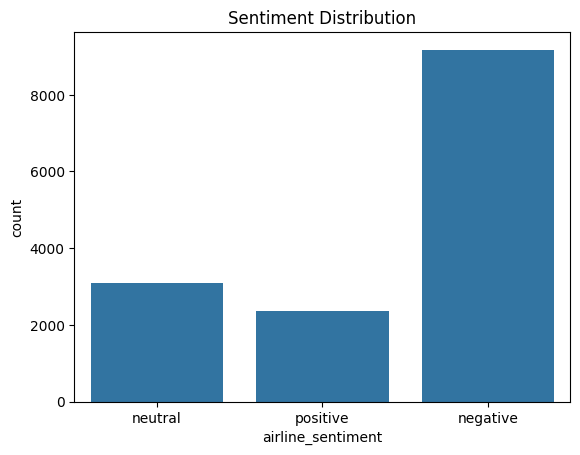

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('Tweets.csv')  # Upload or mount this file

# Select important columns
df = df[['airline_sentiment', 'text']]
df.dropna(inplace=True)

# Check class distribution
sns.countplot(data=df, x='airline_sentiment')
plt.title("Sentiment Distribution")
plt.show()


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+|[^A-Za-z\s]", "", text)
    text = text.lower().split()
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    return " ".join(text)

df['clean_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text']).toarray()
y = df['airline_sentiment']


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7455601092896175
              precision    recall  f1-score   support

    negative       0.74      0.98      0.84      1889
     neutral       0.73      0.26      0.38       580
    positive       0.86      0.40      0.55       459

    accuracy                           0.75      2928
   macro avg       0.78      0.55      0.59      2928
weighted avg       0.75      0.75      0.70      2928



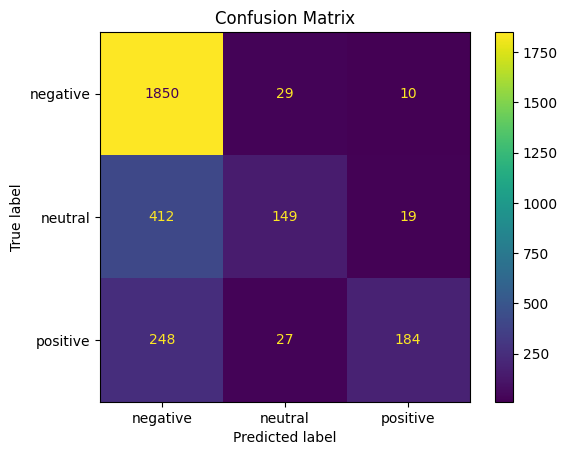

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()
plt.title("Confusion Matrix")
plt.show()
